In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import sweetviz as sv

print("Setup Complete")

/Users/kostya/anaconda3/envs/bank_marketing/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setup Complete


In [2]:
bank = pd.read_csv("./data/bank_marketing_dataset.csv")
bank.dropna(inplace=True)

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1,-1.0,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220.0,1,339.0,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185.0,1,330.0,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199.0,4,-1.0,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226.0,1,-1.0,0,unknown,no


Отрицательных решений банка на подпись продукта значительно больше, чем положительных: 

Text(0.5, 1.0, 'Распределение ответов')

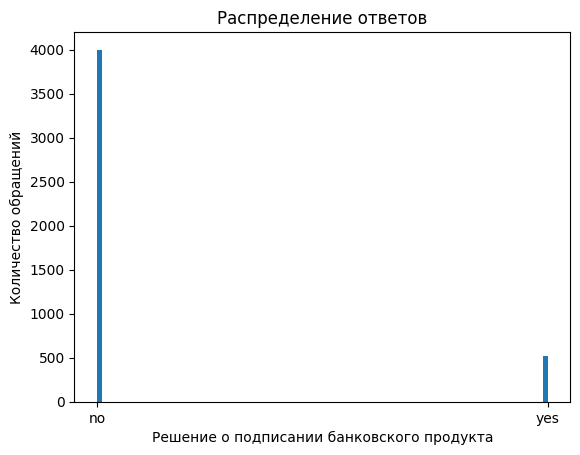

In [4]:
plt.hist(bank['y'].dropna(), bins = 100)
plt.xlabel('Решение о подписании банковского продукта'); plt.ylabel('Количество обращений')
plt.title('Распределение ответов')

Выполним ряд анализов с использованием sweetviz для выделения наиболее значимых признаков, влияющих на результат подписания, а именно на положительный ответ:

In [5]:
report = sv.analyze([bank, "General report"])
report.show_html('bank.html')

Feature: job                                 |████▊                                      | [ 11%]   00:00 -> (00:02 left)/Users/kostya/anaconda3/envs/bank_marketing/lib/python3.10/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: marital                             |███████▏                                   | [ 17%]   00:00 -> (00:02 left)/Users/kostya/anaconda3/envs/bank_marketing/lib/python3.10/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: education                           |█████████▌                                 | [ 22%]   00:00 -> (00:01 left)/Users/kostya/anaconda3/envs/bank_marketing/l

Report bank.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
report = sv.compare_intra(bank, bank["y"] == "yes", ["yes", "no"])
report.show_html('bank_compare_report.html')

Feature: job                                 |████▊                                      | [ 11%]   00:00 -> (00:03 left)/Users/kostya/anaconda3/envs/bank_marketing/lib/python3.10/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
/Users/kostya/anaconda3/envs/bank_marketing/lib/python3.10/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: marital                             |███████▏                                   | [ 17%]   00:00 -> (00:03 left)/Users/kostya/anaconda3/envs/bank_marketing/lib/python3.10/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and w

Report bank_compare_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Вывод

### Данные из отчета bank.html
В результате анализа было выделено три наиболее значимых признака в порядке уменьшения значимости:
1. duration, 
2. previos, 
3. pdays.

![main%20result.jpg](main%20result.jpg)
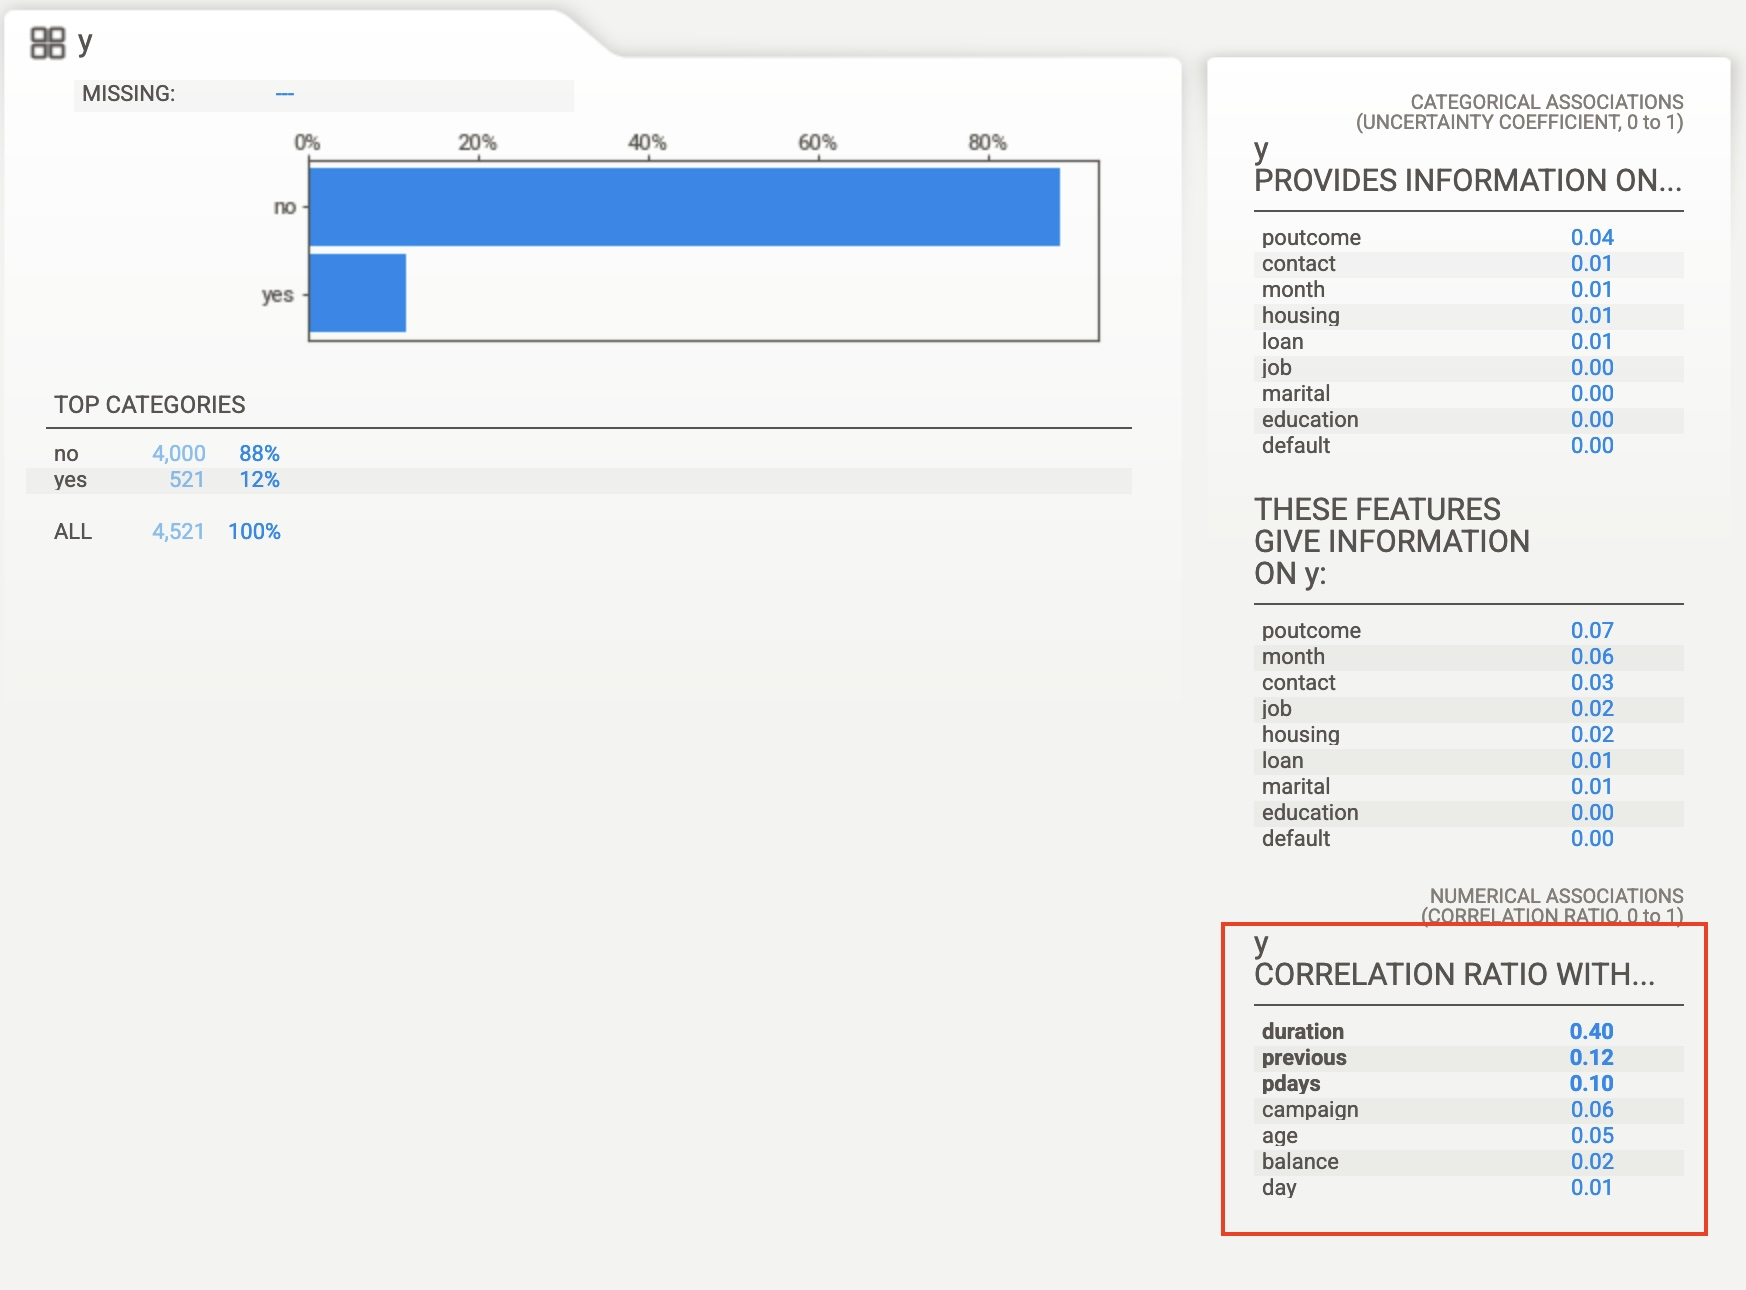

### Данные из отчета bank_compare_report.html
Графики наиболее значимых признаков по отдельности.
Подписан продукт - синий цвет, не подписан продукт - оранжевый цвет.

![duration.png](duration.png)
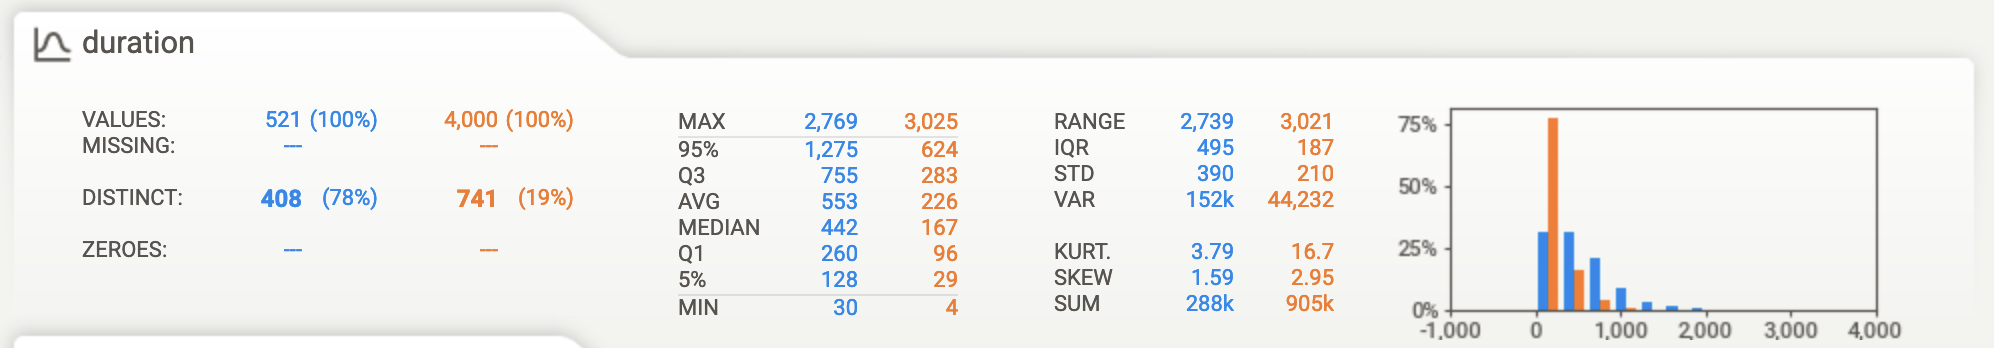

![previous.png](previous.png)
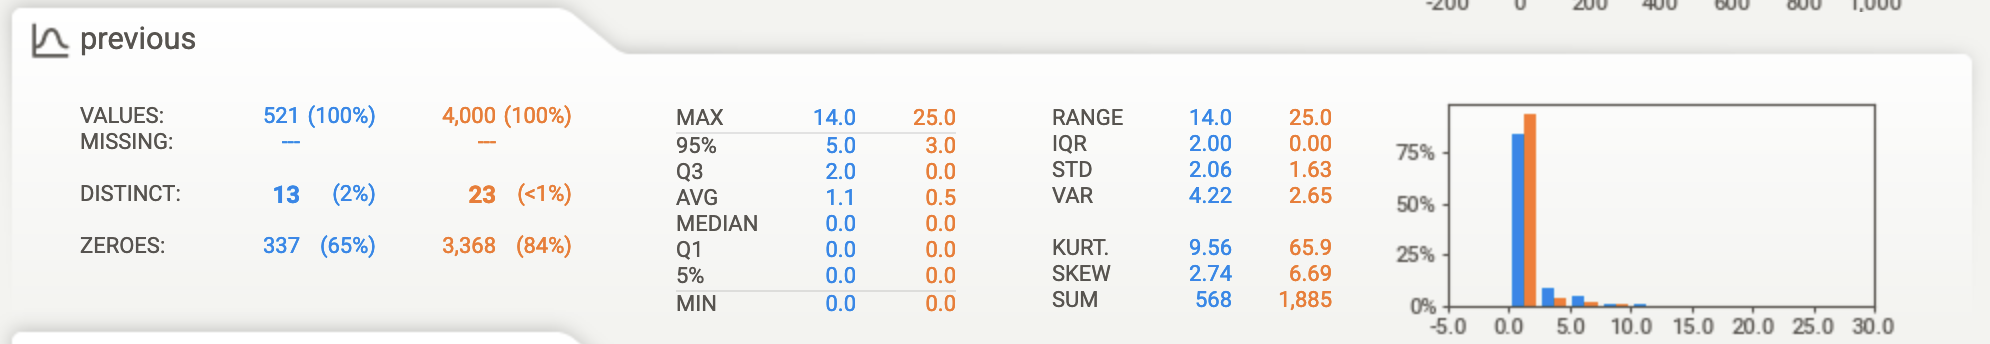

![pdays.png](pdays.png)
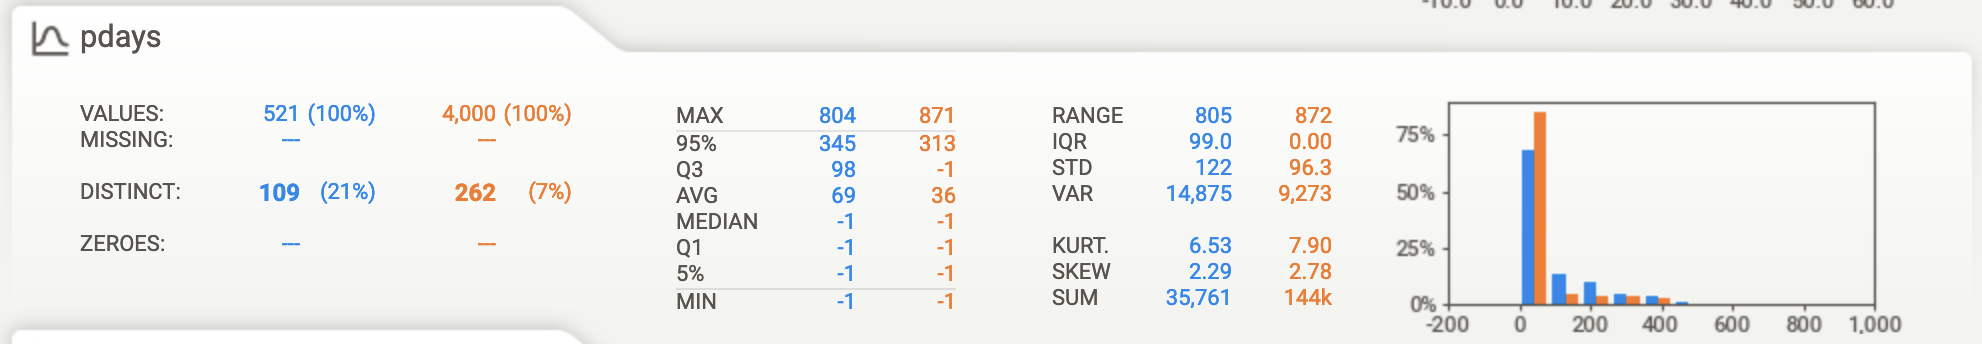